In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# turn off ipython warnings 
import warnings
warnings.filterwarnings('ignore')

### Funções utilizadas no tratamento dos dados

In [2]:
def litologia(facies):
    if facies == 1:
        return 'arenito'
    if facies == 2:
        return 'coarsen siltito'
    if facies == 3:
        return 'siltito fino'
    if facies == 4:
        return 'folhelho e siltito marinho'
    if facies == 5:
        return 'mudstone'
    if facies == 6:
        return 'wackestone'
    if facies == 7:
        return 'dolomita'
    if facies == 8:
        return 'packstone'
    if facies == 9:
        return 'bafflestone'

def phi_n(df):
    return (df['DeltaPHI']+2*df['PHIND'])/2

def phi_d(df):
    return (-df['DeltaPHI']+2*df['PHIND'])/2

### Carregando os dados de treinamento

In [3]:
training_data = pd.read_csv('facies_vectors.csv')
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,NaN,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,NaN,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,NaN,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


### Colocando novos rótulos para as fáceis

In [4]:
training_data['Litologia'] = training_data['Facies'].apply(litologia)
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Litologia
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,siltito fino
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,siltito fino
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,siltito fino
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,siltito fino
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,siltito fino


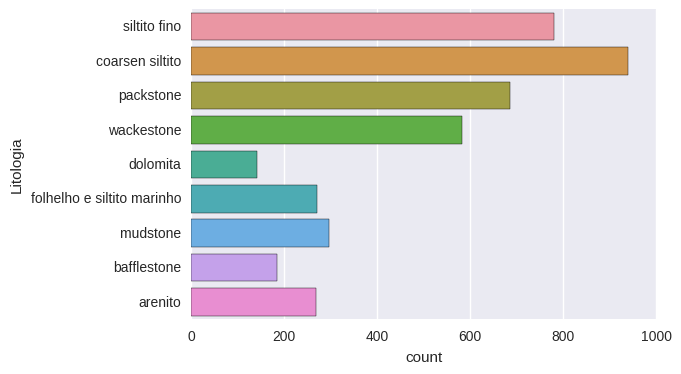

In [5]:
sns.countplot(y=training_data.Litologia)

### Fazendo a análise entre as litologias NM ou M

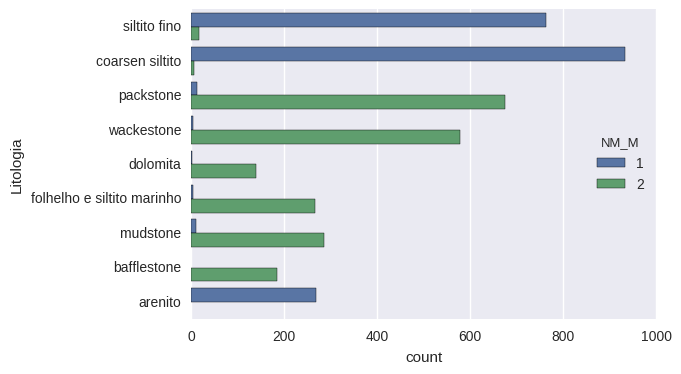

In [6]:
sns.countplot(y=training_data.Litologia,hue=training_data.NM_M)

### Obtendo os valores de $\phi_{N}$ e $\phi_{D}$

$$ DeltaPHI = \phi_{N}-\phi_{D} $$

$$ PHIND = \frac{\phi_{N}+\phi_{D}}{2} $$

$$ \phi_{N} = \frac{DeltaPHI + 2 \times PHIND}{2} $$

$$ \phi_{D} = \frac{-DeltaPHi +2 \times PHIND}{2} $$

In [7]:
training_data['PhiN'] = training_data.apply(phi_n, axis=1)
training_data['PhiD'] = training_data.apply(phi_d, axis=1)
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Litologia,PhiN,PhiD
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,siltito fino,16.865,6.965
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,siltito fino,19.665,5.465
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,siltito fino,20.450,5.650
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,siltito fino,20.065,6.165
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,siltito fino,20.050,6.550


In [41]:
def vsh_older(df):
    grmax=105
    grmin_NM, grmin_M = 26.06,10.149
    if df['NM_M'] == 1:
        igr = (df['GR'] - grmin_NM)/(grmax-grmin_NM)
        return 0.33*(2**(2*igr)-1)
    if df['NM_M'] == 2:
        igr = (df['GR'] - grmin_M)/(grmax - grmin_M)
        return 0.33*(2**(2*igr)-1)
    
# def vsh_older(df):
#     igr_NM = (df.df[df.NM_M == 1].GR.min())/(grmax-df[df.NM_M == 1].GR.min())
#     igr_M = (df.df[df.NM_M == 2].GR.min())/(grmax-df[df.NM_M == 2].GR.min())
#     df['vsh_older']
    
#     df[df.NM_M ==1].apply(lambda igr_NM: )

### Estimando o $GR_{min}$ e o $GR_{max}$

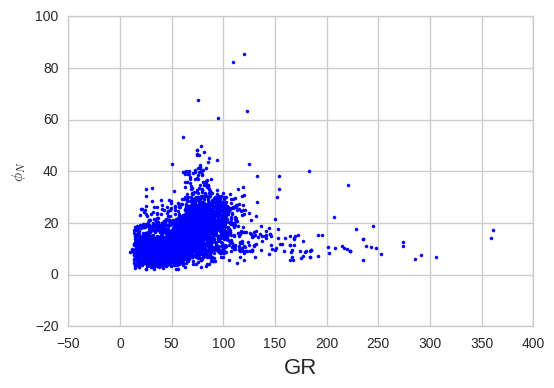

In [42]:
sns.set_style('whitegrid')
plt.xlabel('GR', fontsize=16)
plt.ylabel(r'$\phi_{N}$')
plt.scatter(training_data.GR,training_data.PhiN,marker='.',color='b')

### Observações acerca do dado

A escolha do Grmax foi feita utilizando o seguinte critério: em teoria, a porosidade lida no neutrônico para folhelhos tem que ser alta, logo, o $gr_{max}$ escolhido foi igual a 110, que é justamente onde ocorre um valor alto do GR e de do $\phi_{N}$. Os pontos com GR maior que o $gr_{max}$ podem ser concentração de minerais radiotativos

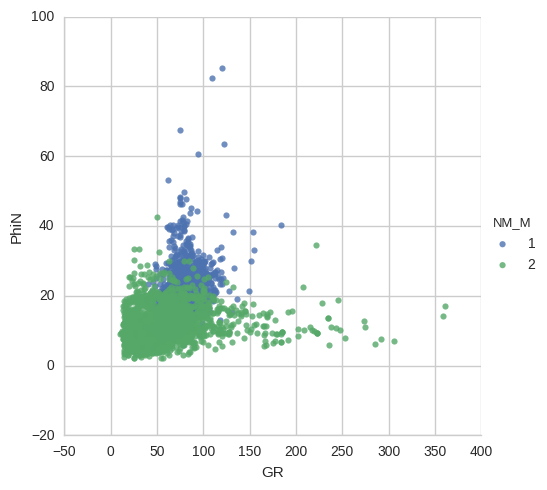

In [43]:
sns.lmplot('GR','PhiN',data=training_data, fit_reg=False, hue='NM_M',)

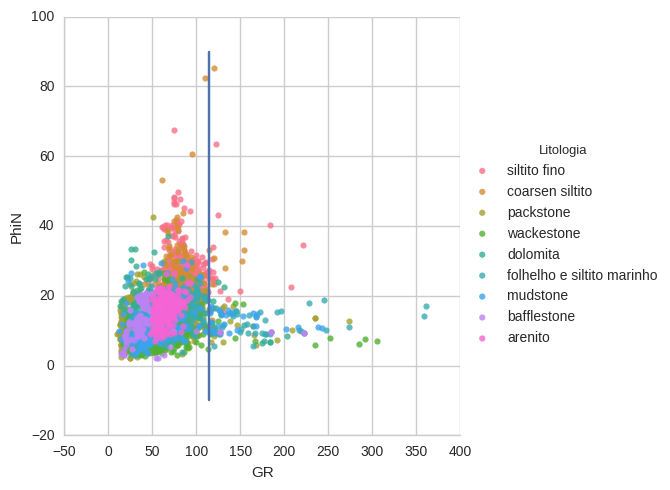

In [44]:
sns.lmplot('GR','PhiN',data=training_data, fit_reg=False, hue='Litologia')
x = [115,115]
y = [-10,90]
plt.plot(x,y)

### Questionamento: devo ou não devo utilizar parâmetros diferentes para diferentes tipos de ambiente?

In [45]:
grmin_NM = training_data[training_data.NM_M == 1].GR.min()
grmin_M = training_data[training_data.NM_M == 2].GR.min()
print(grmin_NM,grmin_M)

26.06 10.149


### Ao criar preditores de folhelho, futuramente, tomar cuidado com os valores cujo o $vsh>1$, pois devem ser mineralizações

In [46]:
training_data['Vsh'] = training_data.apply(vsh_older,axis=1)

In [47]:
training_data[training_data.NM_M == 2].head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Litologia,PhiN,PhiD,Vsh,class_folhelho
43,8,A1 LM,SHRIMPLIN,2814.5,57.02,0.628,11.6,12.090,3.5,2,1.000,packstone,17.890,6.290,0.324673,nao folhelho
44,8,A1 LM,SHRIMPLIN,2815.0,43.29,0.702,7.3,6.705,4.0,2,0.981,packstone,10.355,3.055,0.205641,nao folhelho
45,8,A1 LM,SHRIMPLIN,2815.5,36.06,0.762,5.7,4.595,5.0,2,0.963,packstone,7.445,1.745,0.151928,nao folhelho
46,8,A1 LM,SHRIMPLIN,2816.0,46.00,0.823,5.1,4.620,5.5,2,0.944,packstone,7.170,2.070,0.227283,nao folhelho
47,6,A1 LM,SHRIMPLIN,2816.5,60.30,0.915,4.6,5.010,5.6,2,0.926,wackestone,7.310,2.710,0.356821,nao folhelho


(-1, 2)

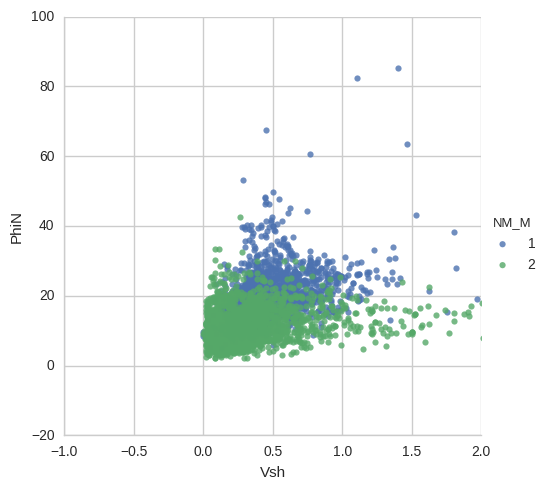

In [48]:
sns.lmplot('Vsh','PhiN',data=training_data,fit_reg=False,hue='NM_M')
plt.xlim(-1,2)

(-1, 2)

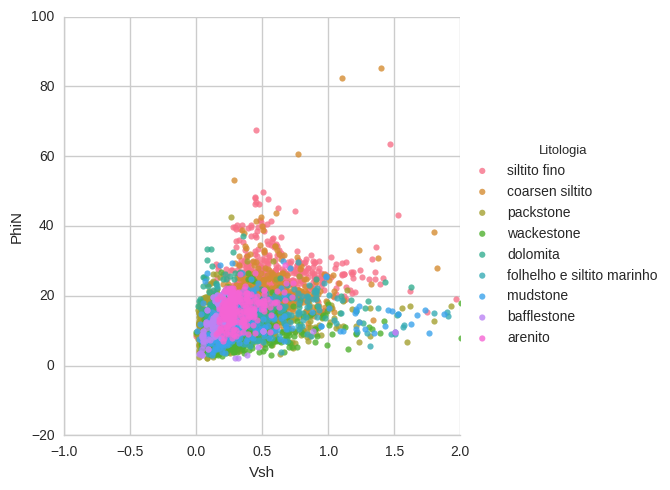

In [79]:
sns.lmplot('Vsh','PhiN',data=training_data,fit_reg=False,hue='Litologia')
plt.xlim(-1,2)

In [49]:
def naofolhelho(vsh):
    if vsh < 0.5:
        return 'nao folhelho'
    if vsh >=0.5 and vsh<1:
        return 'folhelho'
    if vsh>=1:
        return 'desconhecido'

In [50]:
training_data['class_folhelho']=training_data['Vsh'].apply(naofolhelho)

In [51]:
training_data.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Litologia,PhiN,PhiD,Vsh,class_folhelho
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,siltito fino,16.865,6.965,0.483683,nao folhelho
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,siltito fino,19.665,5.465,0.495341,nao folhelho
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,siltito fino,20.450,5.650,0.506871,folhelho
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,siltito fino,20.065,6.165,0.617169,folhelho
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,siltito fino,20.050,6.550,0.443689,nao folhelho


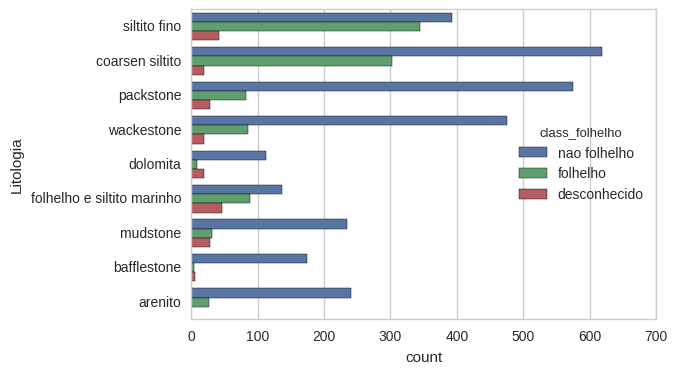

In [53]:
sns.countplot(y=training_data.Litologia, hue=training_data.class_folhelho)

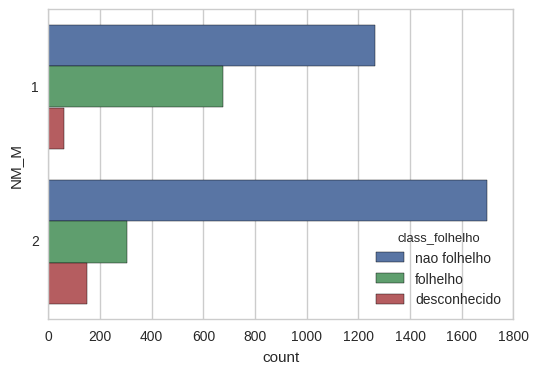

In [55]:
sns.countplot(y=training_data.NM_M, hue=training_data.class_folhelho)

(0, 2)

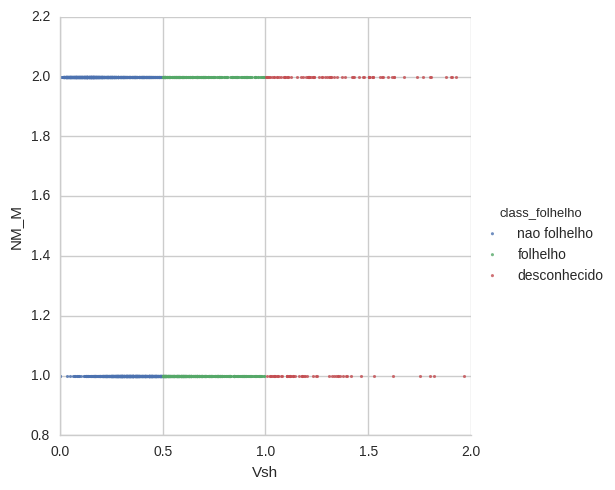

In [84]:
sns.lmplot('Vsh','NM_M',data=training_data,hue='class_folhelho',fit_reg=False,markers='.')
plt.xlim(0,2)

## Análise de Hidrocarboneto

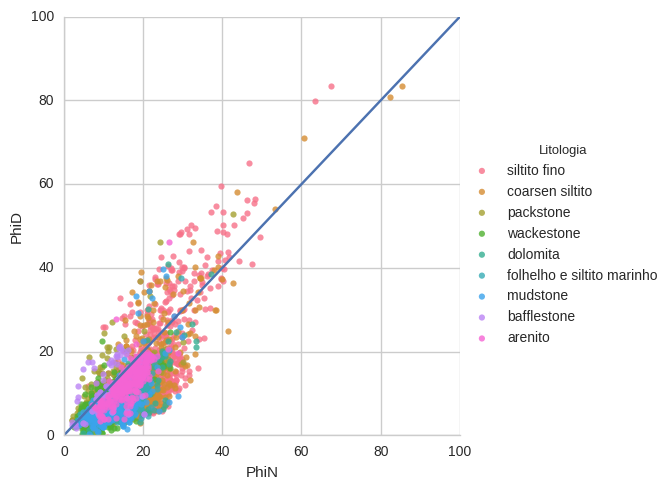

In [58]:
sns.lmplot('PhiN','PhiD',data=training_data,fit_reg=False,hue='Litologia')
plt.xlim(0,100)
plt.ylim(0,100)
x=[0,100]
y=[0,100]
plt.plot(x,y)

In [71]:
HC_training_data = training_data[training_data.PhiD > training_data.PhiN]
HC_training_data['Litologia'].value_counts()
# perfil_schin_reg['Litologia'].value_counts()

siltito fino                  164
packstone                     139
wackestone                     66
coarsen siltito                62
bafflestone                    41
mudstone                       16
arenito                        14
dolomita                        5
folhelho e siltito marinho      3
Name: Litologia, dtype: int64

In [75]:
HC_training_data['Litologia'].value_counts()/HC_training_data.shape[0] *100

siltito fino                  32.156863
packstone                     27.254902
wackestone                    12.941176
coarsen siltito               12.156863
bafflestone                    8.039216
mudstone                       3.137255
arenito                        2.745098
dolomita                       0.980392
folhelho e siltito marinho     0.588235
Name: Litologia, dtype: float64

In [76]:
HC_training_data['Litologia'].value_counts()/training_data.shape[0] *100

siltito fino                  3.952760
packstone                     3.350205
wackestone                    1.590745
coarsen siltito               1.494336
bafflestone                   0.988190
mudstone                      0.385635
arenito                       0.337431
dolomita                      0.120511
folhelho e siltito marinho    0.072307
Name: Litologia, dtype: float64

### Descartando o uso de indicadores de HC como preditores

In [111]:
list_well = set(training_data['Well Name'])
litos = set(training_data['Litologia'])

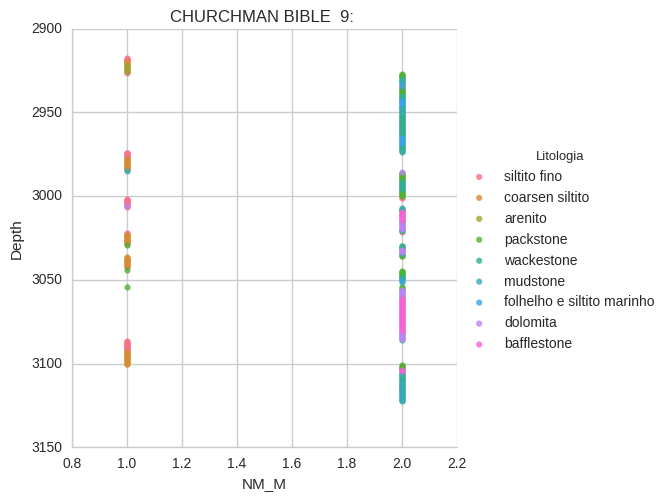

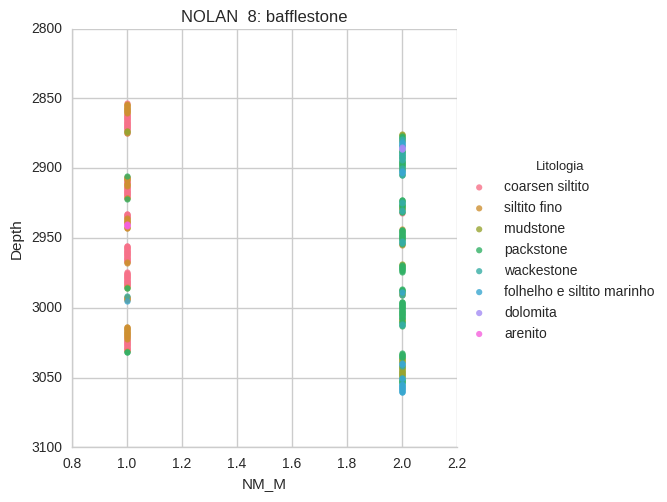

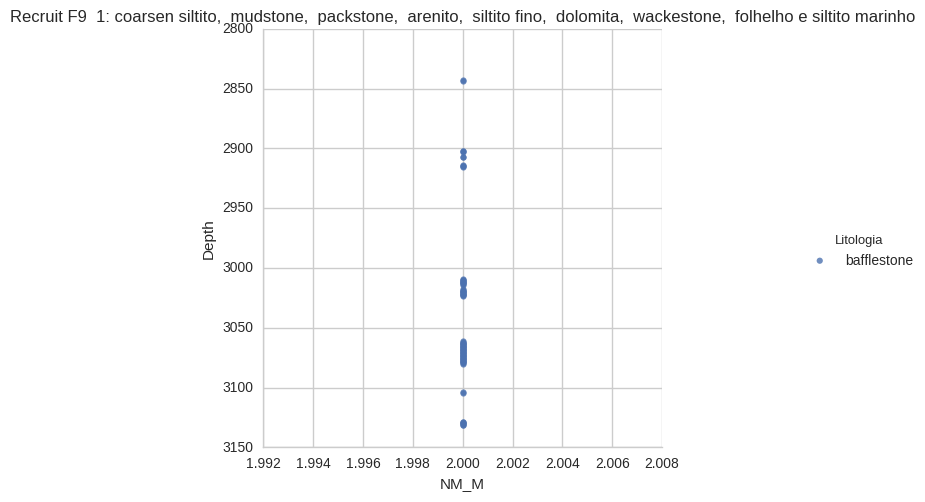

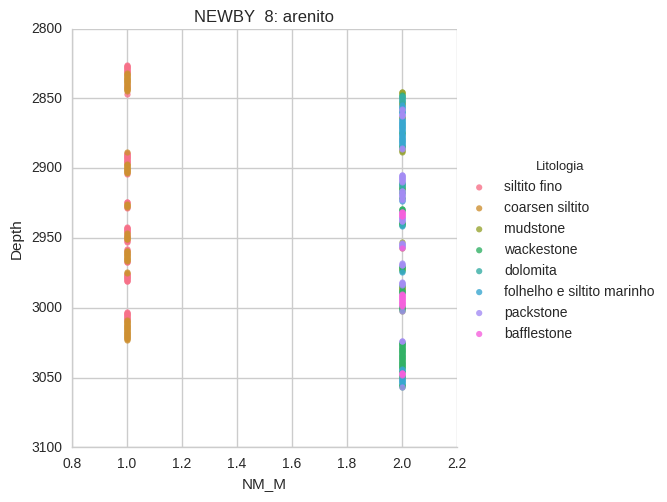

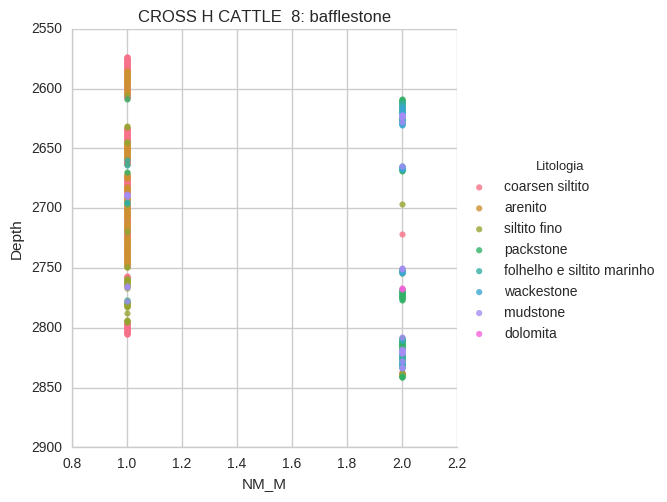

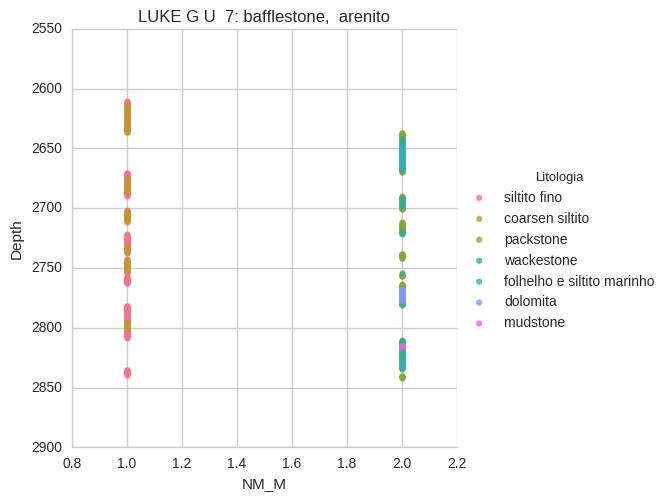

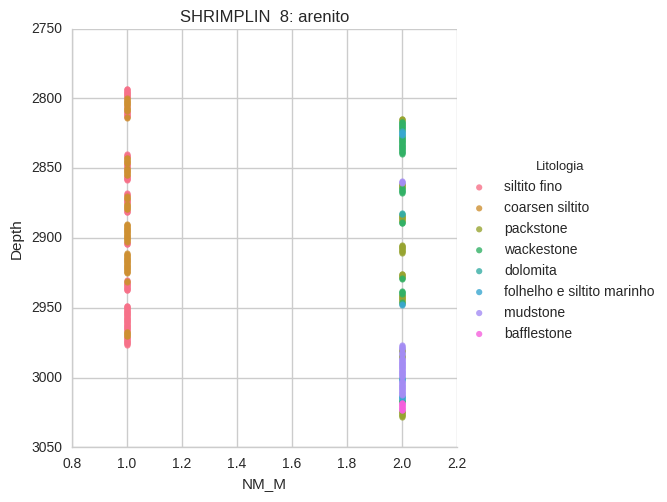

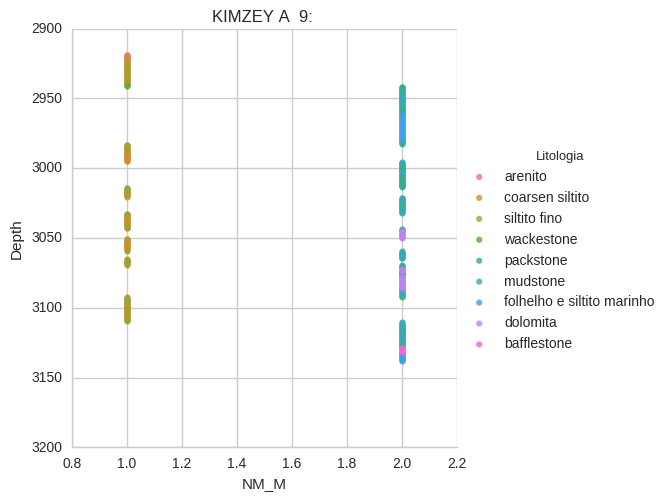

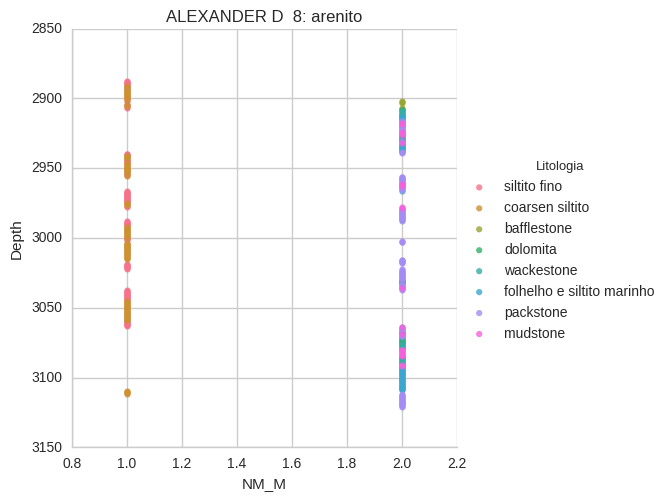

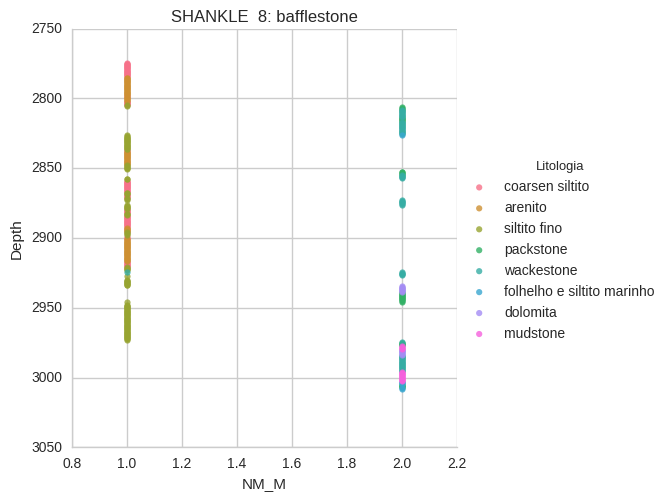

In [113]:
for well in list_well: 
    sns.lmplot('NM_M','Depth',data=training_data[training_data['Well Name'] == well],
               hue= 'Litologia', fit_reg=False)
    lito = set(training_data[training_data['Well Name'] == well].Litologia)
    plt.title(well + '  '+ str(len(lito))+": " +",  ".join(lito^litos))
    plt.gca().invert_yaxis()

In [ ]:
training_data['Well Name']